<a href="https://colab.research.google.com/github/SAIKRISHNA2005/Self-Organizing-Map/blob/main/Self_Organizing_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=602477ec9146e695329f6c5e28d6cd45a02ebf6b7b15dfe7c6fec1548e7510d7
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [3]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Loading Data
data = pd.read_csv('/content/Dataset/Credit_Card_Applications.csv')

In [5]:
# Shape of the data:
data.shape

(690, 16)

In [6]:
# Info of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [7]:
# Defining X variables for the input of SOM

X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

In [8]:
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [9]:
# Y variables:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [11]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [12]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [13]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

In [15]:
# Weights are:
wts = som.get_weights()

In [16]:
# Shape of the weight are:
wts.shape

(10, 10, 13)

In [17]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.25023528, 0.49442488, 0.44720167, 0.31267504, 0.41068564,
        0.39926295, 0.46025311, 0.31932788, 0.39003768, 0.27000146],
       [0.35610757, 0.60618178, 0.72230584, 0.70628878, 0.6913786 ,
        0.7201741 , 0.59770625, 0.802498  , 0.66476116, 0.44506571],
       [0.29586445, 0.69769735, 0.68410479, 0.7161165 , 0.66079914,
        0.56180189, 0.63180457, 0.7391334 , 0.81422111, 0.37416911],
       [0.33246171, 0.71690242, 0.818969  , 0.68198759, 0.60796643,
        0.48284555, 0.60052928, 0.88149324, 0.86175205, 0.46798822],
       [0.51650194, 0.64058873, 0.74986259, 0.77102066, 0.63154463,
        0.63778223, 0.76925008, 0.64689535, 0.62852671, 0.54499992],
       [0.34487748, 0.805412  , 0.95203818, 0.76556631, 0.88077588,
        0.61275365, 0.60790551, 0.63989871, 0.80064115, 0.50910139],
       [0.50215928, 0.75089118, 0.75216325, 1.        , 0.6197047 ,
        0.54569967, 0.67954062, 0.73468856, 0.79158776, 0.46561845],
       [0.52896544, 0.72607723, 0.7579431

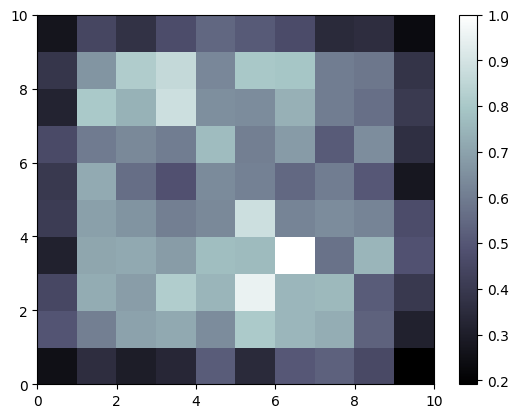

In [18]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

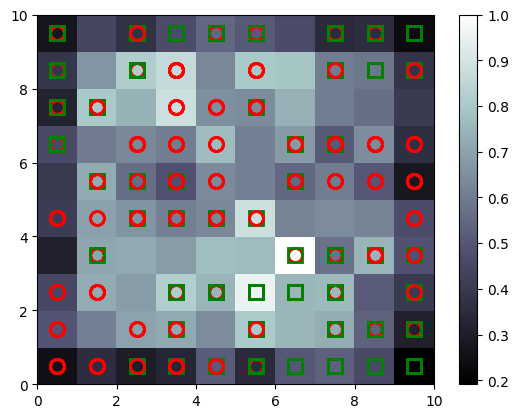

In [19]:
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [20]:
mappings = som.win_map(X)

In [21]:
mappings

defaultdict(list,
            {(3,
              6): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.14030075, 0.08928571, 0.5       , 0.        ,
                     0.        , 0.00298246, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.05263158, 0.10714286, 0.5       , 0.23076923,
                     0.375     , 0.00140351, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.08      ]), array([1.        , 0.15533835, 0.32142857, 0.5       , 0.38461538,
                     0.375     , 0.00877193, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.        ]), array([1.        , 0.22300752, 0.12946429, 0.5       , 0.38461538,
                     0.375     , 0.00877193, 0.    

In [23]:
mappings.keys()

dict_keys([(3, 6), (3, 0), (5, 8), (2, 9), (7, 9), (6, 0), (7, 6), (8, 5), (2, 8), (7, 1), (9, 2), (3, 5), (8, 1), (5, 0), (5, 9), (0, 7), (7, 2), (0, 4), (0, 2), (8, 3), (3, 9), (0, 6), (2, 4), (1, 2), (0, 0), (6, 5), (3, 1), (5, 2), (2, 6), (3, 4), (1, 4), (2, 1), (9, 3), (3, 8), (1, 0), (3, 2), (9, 8), (5, 7), (7, 3), (6, 3), (4, 0), (9, 1), (1, 5), (1, 3), (7, 8), (0, 1), (4, 4), (6, 6), (8, 6), (4, 5), (9, 5), (8, 9), (4, 9), (8, 8), (9, 0), (4, 2), (7, 0), (4, 7), (1, 7), (4, 6), (5, 4), (5, 1), (0, 9), (9, 9), (0, 8), (8, 0), (7, 5), (3, 7), (9, 4), (2, 5), (9, 6), (2, 0), (6, 2)])

In [24]:
# out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it
len(mappings.keys())

73

In [25]:
mappings[(9,8)]

[array([1.        , 0.42481203, 0.34964286, 0.5       , 1.        ,
        0.875     , 0.27929825, 1.        , 1.        , 0.11940299,
        0.        , 0.5       , 0.        ]),
 array([1.        , 0.39849624, 0.76785714, 0.5       , 0.69230769,
        1.        , 0.70175439, 1.        , 1.        , 0.1641791 ,
        0.        , 0.5       , 0.        ]),
 array([1.        , 0.52631579, 0.30357143, 0.5       , 0.53846154,
        0.875     , 0.43859649, 1.        , 1.        , 0.13432836,
        0.        , 0.5       , 0.0905    ]),
 array([1.        , 0.41233083, 0.14428571, 0.5       , 0.92307692,
        0.875     , 0.24561404, 1.        , 1.        , 0.11940299,
        0.        , 0.5       , 0.16      ]),
 array([1.        , 0.2281203 , 0.53571429, 0.5       , 0.53846154,
        0.875     , 0.18719298, 1.        , 1.        , 0.1641791 ,
        0.        , 0.5       , 0.        ]),
 array([1.        , 0.61774436, 0.55357143, 0.5       , 0.69230769,
        1.        , 0.

In [26]:
# Taking some of the red circular from the heat map and mapping as Frauds:

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

In [27]:
frauds

array([[1.        , 0.22556391, 0.04160714, 0.5       , 0.23076923,
        0.375     , 0.01754386, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.14      ],
       [1.        , 0.14285714, 0.03571429, 0.5       , 0.53846154,
        0.375     , 0.02929825, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.15      ],
       [1.        , 0.03759398, 0.02982143, 0.5       , 0.46153846,
        0.375     , 0.00298246, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.1       ],
       [1.        , 0.45864662, 0.01785714, 0.5       , 0.46153846,
        0.375     , 0.37719298, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       ],
       [1.        , 0.09654135, 0.20089286, 0.5       , 0.61538462,
        0.375     , 0.06      , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.06      ],
       [1.        , 0.43729323, 0.16517857, 0.5       , 0.76923077,
        0.375     , 0.16070

In [28]:
frauds.shape

(15, 13)

In [29]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [30]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,28.75,1.165,2.0,4.0,4.0,0.500,1.0,0.0,0.0,0.0,1.0,280.0
1,1.0,23.25,1.000,2.0,8.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,300.0
2,1.0,16.25,0.835,2.0,7.0,4.0,0.085,1.0,0.0,0.0,0.0,1.0,200.0
3,1.0,44.25,0.500,2.0,7.0,4.0,10.750,1.0,0.0,0.0,0.0,1.0,400.0
4,1.0,20.17,5.625,2.0,9.0,4.0,1.710,1.0,0.0,0.0,0.0,1.0,120.0
5,1.0,42.83,4.625,2.0,11.0,4.0,4.580,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,39.83,0.500,2.0,7.0,4.0,0.250,1.0,0.0,0.0,0.0,1.0,288.0
7,1.0,48.17,3.500,2.0,6.0,4.0,3.500,1.0,0.0,0.0,0.0,1.0,230.0
8,1.0,27.75,0.585,1.0,13.0,4.0,0.250,1.0,1.0,2.0,0.0,2.0,260.0
9,1.0,22.67,1.585,1.0,9.0,4.0,3.085,1.0,1.0,6.0,0.0,2.0,80.0
